# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [2]:
pip install citipy

Note: you may need to restart the kernel to use updated packages.


In [118]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
import scipy.stats as st
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 593


In [87]:
# Base URL for the OpenWeather API 
base_url = "http://api.openweathermap.org/data/2.5/weather?" 
# Empty list to hold weather data 
weather_data = [] 
# Fetch weather data for each city 
for city in cities: 
    query_url = f"{base_url}q={city}&appid={weather_api_key}&units=imperial"
    response = requests.get(query_url) 
    if response.status_code == 200: 
        weather_data.append(response.json()) 
# Print the weather data for testing 
    # for data in weather_data: 
        # print(json.dumps(data, indent=4))

---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [90]:
# Set the API base URL
base_url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
weather_data = []
# Lat	= []
# Lng	= []
# Max Temp = []
# Humidity = []	
# Cloudiness = []	
# Wind Speed = []	
# Country	= []
# Date = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    query_url = f"{base_url}q={city}&appid={weather_api_key}&units=imperial"

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))
        
    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        response = requests.get(query_url)
        city_weather = response.json()
            # if response.status_code ==200:
            # weather_data.append(response.json())
            
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather.get("coord", {}).get("lat")
        city_lng = city_weather.get("coord", {}).get("lon")
        city_max_temp = city_weather.get("main", {}).get("temp_max")
        city_humidity = city_weather.get("main", {}).get("humidity")
        city_clouds = city_weather.get("clouds", {}).get("all")
        city_wind = city_weather.get("wind", {}).get("speed")
        city_country = city_weather.get("sys", {}).get("country")
        city_date = city_weather.get("dt")

        # Append the City information into city_data list
        weather_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except Exception as e:
        print(f"City: {city} not found. Skipping...")
        
    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | yellowknife
Processing Record 2 of Set 1 | mujiayingzi
Processing Record 3 of Set 1 | newman
Processing Record 4 of Set 1 | puspokladany
Processing Record 5 of Set 1 | bilibino
Processing Record 6 of Set 1 | college
Processing Record 7 of Set 1 | georgetown
Processing Record 8 of Set 1 | paradip garh
Processing Record 9 of Set 1 | alibag
Processing Record 10 of Set 1 | hithadhoo
Processing Record 11 of Set 1 | puerto natales
Processing Record 12 of Set 1 | isangel
Processing Record 13 of Set 1 | port alfred
Processing Record 14 of Set 1 | hawaiian paradise park
Processing Record 15 of Set 1 | north bend
Processing Record 16 of Set 1 | kingston
Processing Record 17 of Set 1 | coquimbo
Processing Record 18 of Set 1 | invercargill
Processing Record 19 of Set 1 | al kharijah
Processing Record 20 of Set 1 | kayangel
Processing Record 21 of Set 1 | aldan
Processing Record 22 of Set 1 | ilulissat
Proces

In [93]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(weather_data) 

# Show Record Count
city_data_df.count()

City          593
Lat           568
Lng           568
Max Temp      568
Humidity      568
Cloudiness    568
Wind Speed    568
Country       568
Date          568
dtype: int64

In [95]:
# remove empty rows
city_data_df.dropna(subset=["Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed", "Country", "Date"], how="any", inplace=True)

# Convert Unix timestamps 
city_data_df["Date"] = pd.to_datetime(city_data_df["Date"], unit="s")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,yellowknife,62.4560,-114.3525,25.32,93.0,100.0,11.50,CA,2024-11-07 03:22:36
1,mujiayingzi,42.1167,118.7833,46.80,36.0,2.0,5.77,CN,2024-11-07 03:22:42
2,newman,37.3138,-121.0208,54.05,57.0,1.0,1.99,US,2024-11-07 03:22:42
3,puspokladany,47.3167,21.1167,34.97,61.0,26.0,4.47,HU,2024-11-07 03:22:42
4,bilibino,68.0546,166.4372,-8.34,100.0,100.0,1.90,RU,2024-11-07 03:22:43


In [96]:
# Show Updated Record Count
city_data_df.count()

City          568
Lat           568
Lng           568
Max Temp      568
Humidity      568
Cloudiness    568
Wind Speed    568
Country       568
Date          568
dtype: int64

In [179]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [180]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,yellowknife,62.4560,-114.3525,25.32,93.0,100.0,11.50,CA,2024-11-07 03:22:36
1,mujiayingzi,42.1167,118.7833,46.80,36.0,2.0,5.77,CN,2024-11-07 03:22:42
2,newman,37.3138,-121.0208,54.05,57.0,1.0,1.99,US,2024-11-07 03:22:42
3,puspokladany,47.3167,21.1167,34.97,61.0,26.0,4.47,HU,2024-11-07 03:22:42
4,bilibino,68.0546,166.4372,-8.34,100.0,100.0,1.90,RU,2024-11-07 03:22:43


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

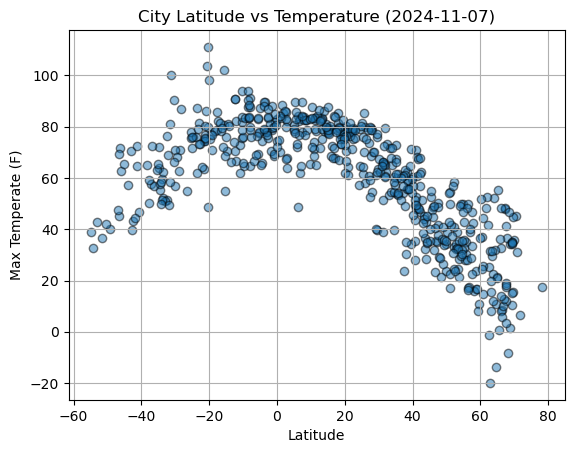

In [181]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], alpha=0.5, edgecolors="black")
plt.grid(True)

# Incorporate the other graph properties
plt.title("City Latitude vs Temperature (2024-11-07)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperate (F)")

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

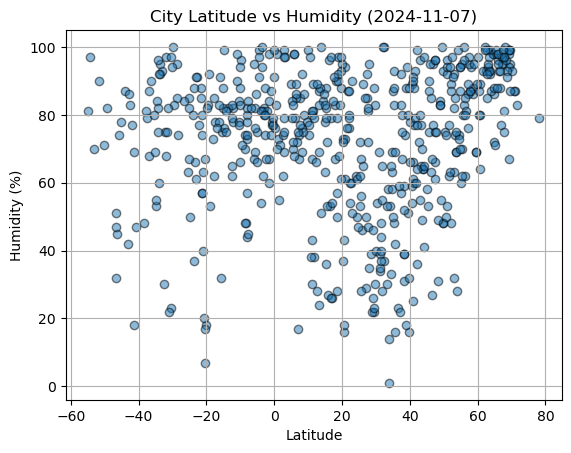

In [182]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], alpha=0.5, edgecolors="black")
plt.grid(True)

# Incorporate the other graph properties
plt.title("City Latitude vs Humidity (2024-11-07)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

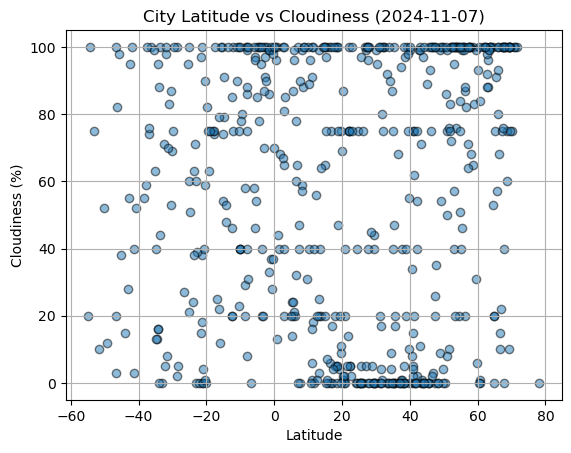

In [183]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], alpha=0.5, edgecolors="black")
plt.grid(True)

# Incorporate the other graph properties
plt.title("City Latitude vs Cloudiness (2024-11-07)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

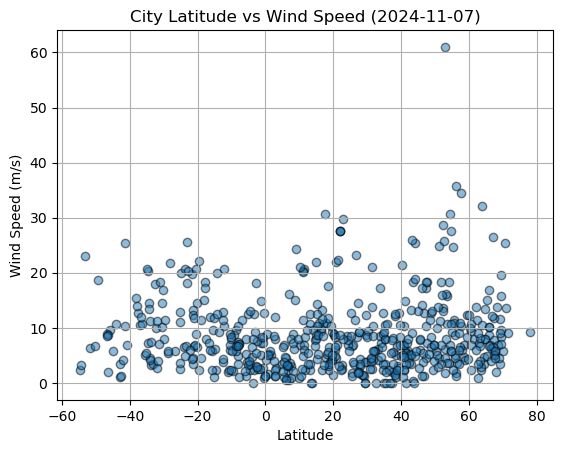

In [185]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], alpha=0.5, edgecolors="black")
plt.grid(True)

# Incorporate the other graph properties
plt.title("City Latitude vs Wind Speed (2024-11-07)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [107]:
# Define a function to create Linear Regression plots
correlation = st.pearsonr(df["x_value"], df["y_value"])
slope, intercept, r_value, p_value, std_err = st.linregress(df["x_value"], df["y_value"])
regression_line = slope * df["Lat"] + intercept

# Create the scatter plot  
plt.scatter(df["x_value"], df["y_value"], alpha=0.5, edgecolors="black") 

# Plot the linear regression line 
plt.plot(df["x_value"], regression_line, color="red") 

# Add labels, and title 
plt.xlabel("x") 
plt.ylabel("y") 
plt.title("x vs y") 

equation_text = f"y = {slope:.2f}x + {intercept:.2f}" 
plt.text(x.min(), y.min(), equation_text, fontsize=14, color="red") 

# Print the Pearson correlation coefficient 
print(f"The r^2 value is: {r_value**2}") 

# Show the plot 
plt.show() 

In [111]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hem_df = city_data_df[city_data_df["Lat"] > 0]

# Display sample data
northern_hem_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,yellowknife,62.4560,-114.3525,25.32,93.0,100.0,11.50,CA,2024-11-07 03:22:36
1,mujiayingzi,42.1167,118.7833,46.80,36.0,2.0,5.77,CN,2024-11-07 03:22:42
2,newman,37.3138,-121.0208,54.05,57.0,1.0,1.99,US,2024-11-07 03:22:42
3,puspokladany,47.3167,21.1167,34.97,61.0,26.0,4.47,HU,2024-11-07 03:22:42
4,bilibino,68.0546,166.4372,-8.34,100.0,100.0,1.90,RU,2024-11-07 03:22:43


In [112]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hem_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hem_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
9,hithadhoo,-0.6000,73.0833,81.86,77.0,99.0,8.16,MV,2024-11-07 03:22:43
10,puerto natales,-51.7236,-72.4875,36.52,90.0,10.0,6.42,CL,2024-11-07 03:22:43
11,isangel,-19.5500,169.2667,77.11,83.0,75.0,2.30,VU,2024-11-07 03:22:43
12,port alfred,-33.5906,26.8910,52.18,92.0,44.0,3.29,ZA,2024-11-07 03:22:43
16,coquimbo,-29.9533,-71.3436,56.93,100.0,75.0,8.05,CL,2024-11-07 03:22:44


###  Temperature vs. Latitude Linear Regression Plot

The r^2 value is: 0.7490222832382321


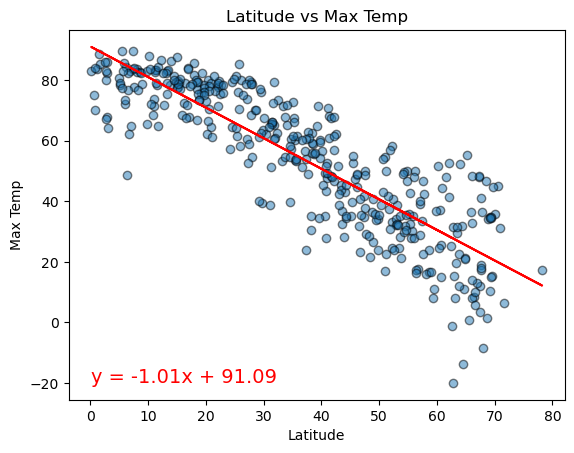

In [159]:
# Linear regression on Northern Hemisphere - Temperature
correlation = st.pearsonr(northern_hem_df["Lat"], northern_hem_df["Max Temp"])
slope, intercept, r_value, p_value, std_err = st.linregress(northern_hem_df["Lat"], northern_hem_df["Max Temp"])
regression_line = slope * northern_hem_df["Lat"] + intercept

# Create the scatter plot  
plt.scatter(northern_hem_df["Lat"], northern_hem_df["Max Temp"], alpha=0.5, edgecolors="black") 

# Plot the linear regression line 
plt.plot(northern_hem_df["Lat"], regression_line, color="red") 

# Add labels, and title 
plt.xlabel("Latitude") 
plt.ylabel("Max Temp") 
plt.title("Latitude vs Max Temp") 

equation_text = f"y = {slope:.2f}x + {intercept:.2f}" 
plt.text(x.min(), y.min(), equation_text, fontsize=14, color="red") 

# Print the Pearson correlation coefficient 
print(f"The r^2 value is: {r_value**2}") 

# Show the plot 
plt.show() 

# Discussion about the linear relationship: 
For lat vs temp in the northern hemisphere, 74.9% of the time we can explain that
as we move closer to the equator our "Max Temps" will increase so our regression 
line as a good fit to this data comparison. We also have a negative linear relationship 
with latitude and temperature, so for example as our latitude increases our max temps 
are decreasing and vice versa when our latitude increases. 

The r^2 value is: 0.4121617780759357


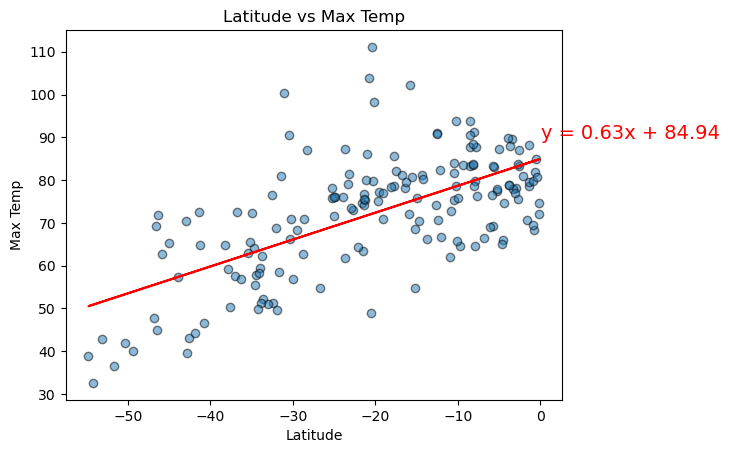

In [164]:
# Linear regression on Southern Hemisphere - Temperature
correlation = st.pearsonr(southern_hem_df["Lat"], southern_hem_df["Max Temp"])
slope, intercept, r_value, p_value, std_err = st.linregress(southern_hem_df["Lat"], southern_hem_df["Max Temp"])
regression_line = slope * southern_hem_df["Lat"] + intercept

# Create the scatter plot  
plt.scatter(southern_hem_df["Lat"], southern_hem_df["Max Temp"], alpha=0.5, edgecolors="black") 

# Plot the linear regression line 
plt.plot(southern_hem_df["Lat"], regression_line, color="red") 

# Add labels, and title 
plt.xlabel("Latitude") 
plt.ylabel("Max Temp") 
plt.title("Latitude vs Max Temp") 

equation_text = f"y = {slope:.2f}x + {intercept:.2f}" 
plt.text(x.min(), y.max(), equation_text, fontsize=14, color="red")

# Print the Pearson correlation coefficient
print(f"The r^2 value is: {r_value**2}") 

# Show the plot 
plt.show() 

**Discussion about the linear relationship:** Our r^2 value shows that only 41% of the time in our southern hemisphere cities is our latitude a good fit towards max temps however we have a positive linear relationship with as we move closer to 0, (equator) our temperatures increase, i.e. as x increases, so does y.

### Humidity vs. Latitude Linear Regression Plot

The r^2 value is: 0.06516716814601627


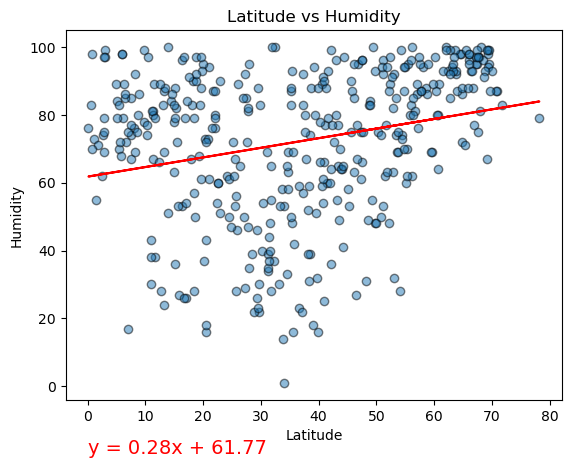

In [169]:
# Linear regression on Northern Hemisphere - Humidity
correlation = st.pearsonr(northern_hem_df["Lat"], northern_hem_df["Humidity"])
slope, intercept, r_value, p_value, std_err = st.linregress(northern_hem_df["Lat"], northern_hem_df["Humidity"])
regression_line = slope * northern_hem_df["Lat"] + intercept

# Calculate linear regression 
# slope, intercept, r_value, p_value, std_err = linregress(x, y) 

# Create the scatter plot  
plt.scatter(northern_hem_df["Lat"], northern_hem_df["Humidity"], alpha=0.5, edgecolors="black") 

# Plot the linear regression line 
plt.plot(northern_hem_df["Lat"], regression_line, color="red") 

# Add labels, and title 
plt.xlabel("Latitude") 
plt.ylabel("Humidity") 
plt.title("Latitude vs Humidity") 


equation_text = f"y = {slope:.2f}x + {intercept:.2f}" 
plt.text(x.min(), y.min(), equation_text, fontsize=14, color="red")

# Print the Pearson correlation coefficient 
print(f"The r^2 value is: {r_value**2}") 

# Show the plot 
plt.show() 

**Discussion about linear relationship:**  Our slope is positive giving us a postive relation however the percent chance this positive relationship occurs is low @ approx. 6.5%

The r^2 value is: 0.023715893041782288


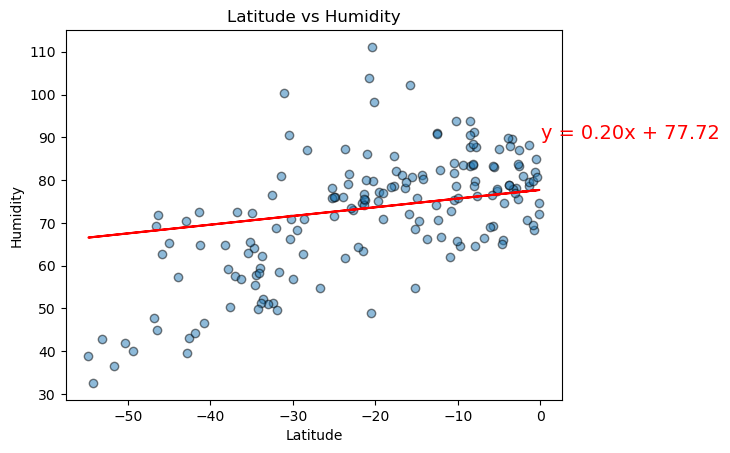

In [170]:
# Linear regression on Southern Hemisphere - Humidity
correlation = st.pearsonr(southern_hem_df["Lat"], southern_hem_df["Humidity"])
slope, intercept, r_value, p_value, std_err = st.linregress(southern_hem_df["Lat"], southern_hem_df["Humidity"])
regression_line = slope * southern_hem_df["Lat"] + intercept

# Create the scatter plot  
plt.scatter(southern_hem_df["Lat"], southern_hem_df["Max Temp"], alpha=0.5, edgecolors="black") 

# Plot the linear regression line 
plt.plot(southern_hem_df["Lat"], regression_line, color="red") 

# Add labels, and title 
plt.xlabel("Latitude") 
plt.ylabel("Humidity") 
plt.title("Latitude vs Humidity") 

equation_text = f"y = {slope:.2f}x + {intercept:.2f}" 
plt.text(x.min(), y.max(), equation_text, fontsize=14, color="red") 

# Print the Pearson correlation coefficient
print(f"The r^2 value is: {r_value**2}") 

# Show the plot 
plt.show() 

**Discussion about the linear relationship:** We havea positive relationship which is reasonably flat meaning as x increases by 1, y only increases by 0.2. We also havea a low possibility of fitting in due to the value of x, (latitude) occuring with a very low r^2 score.

### Cloudiness vs. Latitude Linear Regression Plot

The r^2 value is: 0.05279775961470442


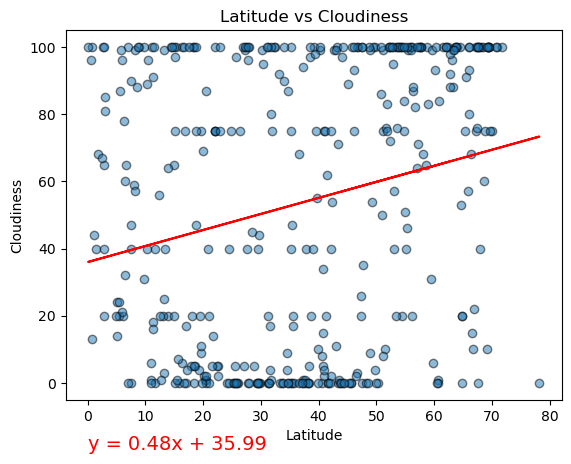

In [172]:
# Linear regression on Northern Hemisphere - Cloudiness
correlation = st.pearsonr(northern_hem_df["Lat"], northern_hem_df["Cloudiness"])
slope, intercept, r_value, p_value, std_err = st.linregress(northern_hem_df["Lat"], northern_hem_df["Cloudiness"])
regression_line = slope * northern_hem_df["Lat"] + intercept

# Calculate linear regression 
# slope, intercept, r_value, p_value, std_err = linregress(x, y) 

# Create the scatter plot  
plt.scatter(northern_hem_df["Lat"], northern_hem_df["Cloudiness"], alpha=0.5, edgecolors="black") 

# Plot the linear regression line 
plt.plot(northern_hem_df["Lat"], regression_line, color="red") 

# Add labels, and title 
plt.xlabel("Latitude") 
plt.ylabel("Cloudiness") 
plt.title("Latitude vs Cloudiness") 


equation_text = f"y = {slope:.2f}x + {intercept:.2f}" 
plt.text(x.min(), y.min(), equation_text, fontsize=14, color="red")

# Print the Pearson correlation coefficient 
print(f"The r^2 value is: {r_value**2}") 

# Show the plot 
plt.show() 

**Discussion about the linear relationship:** As x increases by 1, our y value increases by approx. half so the further from the equator we get, we have approx. 50% chance for increase in clouds. Our relationship with x & y is positive but with the low r^2 score we can only account for this relationship to be as a result of equator 5.279% of the time. 

The r^2 value is: 0.05279841930175436


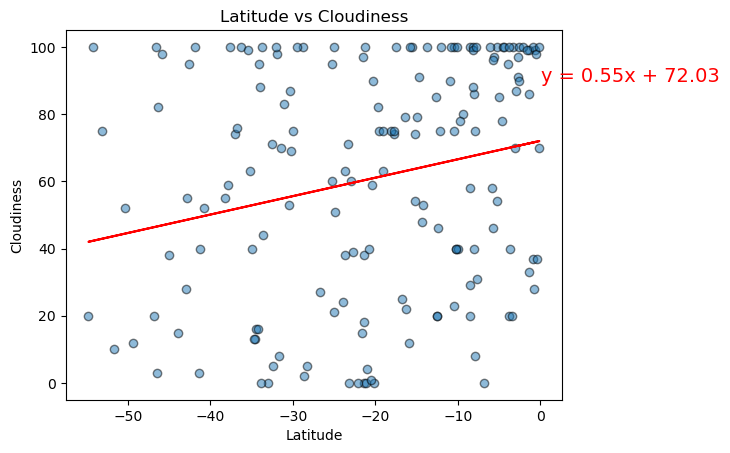

In [171]:
# Linear regression on Southern Hemisphere - cloudiness
correlation = st.pearsonr(southern_hem_df["Lat"], southern_hem_df["Cloudiness"])
slope, intercept, r_value, p_value, std_err = st.linregress(southern_hem_df["Lat"], southern_hem_df["Cloudiness"])
regression_line = slope * southern_hem_df["Lat"] + intercept

# Create the scatter plot  
plt.scatter(southern_hem_df["Lat"], southern_hem_df["Cloudiness"], alpha=0.5, edgecolors="black") 

# Plot the linear regression line 
plt.plot(southern_hem_df["Lat"], regression_line, color="red") 

# Add labels, and title 
plt.xlabel("Latitude") 
plt.ylabel("Cloudiness") 
plt.title("Latitude vs Cloudiness") 

equation_text = f"y = {slope:.2f}x + {intercept:.2f}" 
plt.text(x.min(), y.max(), equation_text, fontsize=14, color="red") 

# Print the Pearson correlation coefficient
print(f"The r^2 value is: {r_value**2}") 

# Show the plot 
plt.show() 

**Discussion about the linear relationship:** Our southern hemispher latitude vs cloudiness is very similar to our northern hemisphere. with a steeper positive relationship with a low degree of certainty as to why our cloud cover is increasing @ 5.279%

### Wind Speed vs. Latitude Linear Regression Plot

The r^2 value is: 0.023032528204581546


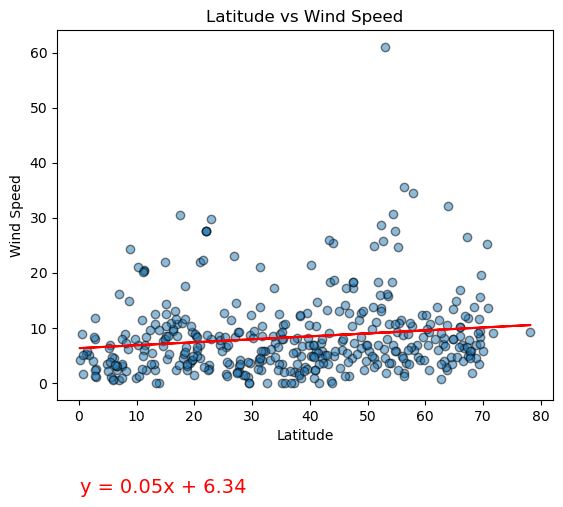

In [173]:
# Linear regression on Northern Hemisphere - Wind Speed
correlation = st.pearsonr(northern_hem_df["Lat"], northern_hem_df["Wind Speed"])
slope, intercept, r_value, p_value, std_err = st.linregress(northern_hem_df["Lat"], northern_hem_df["Wind Speed"])
regression_line = slope * northern_hem_df["Lat"] + intercept

# Calculate linear regression 
# slope, intercept, r_value, p_value, std_err = linregress(x, y) 

# Create the scatter plot  
plt.scatter(northern_hem_df["Lat"], northern_hem_df["Wind Speed"], alpha=0.5, edgecolors="black") 

# Plot the linear regression line 
plt.plot(northern_hem_df["Lat"], regression_line, color="red") 

# Add labels, and title 
plt.xlabel("Latitude") 
plt.ylabel("Wind Speed") 
plt.title("Latitude vs Wind Speed") 


equation_text = f"y = {slope:.2f}x + {intercept:.2f}" 
plt.text(x.min(), y.min(), equation_text, fontsize=14, color="red")

# Print the Pearson correlation coefficient 
print(f"The r^2 value is: {r_value**2}") 

# Show the plot 
plt.show() 

**Discussion about the linear relationship:** There is very little relationship for latitue and windspeed and very little confidence that latitude is causing increase in windspeed with a very low r^2 percentage. 

The r^2 value is: 0.0471986571979024


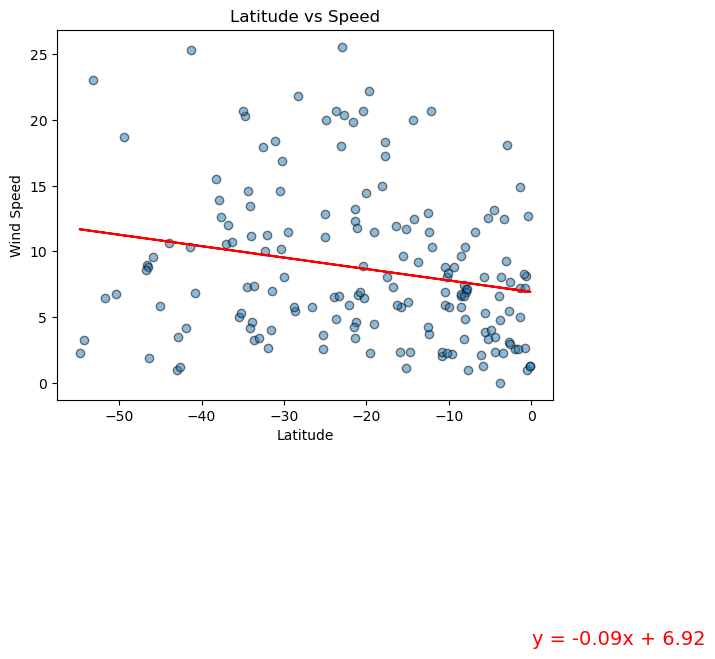

In [177]:
# Linear regression on Southern Hemisphere - Wind Speed
correlation = st.pearsonr(southern_hem_df["Lat"], southern_hem_df["Wind Speed"])
slope, intercept, r_value, p_value, std_err = st.linregress(southern_hem_df["Lat"], southern_hem_df["Wind Speed"])
regression_line = slope * southern_hem_df["Lat"] + intercept

# Create the scatter plot  
plt.scatter(southern_hem_df["Lat"], southern_hem_df["Wind Speed"], alpha=0.5, edgecolors="black") 

# Plot the linear regression line 
plt.plot(southern_hem_df["Lat"], regression_line, color="red") 

# Add labels, and title 
plt.xlabel("Latitude") 
plt.ylabel("Wind Speed") 
plt.title("Latitude vs Speed") 

equation_text = f"y = {slope:.2f}x + {intercept:.2f}" 
plt.text(x.min(), y.min(), equation_text, fontsize=14, color="red") 

# Print the Pearson correlation coefficient
print(f"The r^2 value is: {r_value**2}") 

# Show the plot 
plt.show() 

**Discussion about the linear relationship:**  there is a negative relationshp for latitude and windspeed in southern hemisphere and we can only account for it as the cause < 5% of the time. 